In [84]:
import numpy as np
import seaborn as sns
import folium
import pandas as pd
import geopandas as gpd
import geopandas
import geoplot

In [11]:
data=pd.read_csv('/Users/jeffreyng/Downloads/Data/Housing_Loss_Data/orange_fl_processed_2017_to_2019_20210916.csv')

In [64]:
result=data.set_index('census_tract_GEOID')

In [13]:
data.columns

Index(['census_tract_GEOID', 'total-households',
       'total-renter-occupied-households', 'total-owner-occupied-households',
       'total-owner-occupied-households-mortgage', 'median-gross-rent',
       'median-household-income', 'median-property-value',
       'median-monthly-housing-cost', 'pct-white', 'pct-af-am', 'pct-hispanic',
       'pct-am-indian', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other',
       'pct-below-poverty-level', 'households-children',
       'single-parent-household', 'older-adult-alone', 'level-of-education',
       'immigrant-status', 'english-fluency', 'drive-to-work',
       'public-transport-to-work', 'vacant-properties', 'live-in-mobile-home',
       'pct-renter-occupied', 'pct-owner-occupied',
       'pct-owner-occupied-mortgage', 'pct-owner-occupied-without-mortgage',
       'median-house-age', 'pct-non-white', 'pct-without-health-insurance',
       'total-evictions', 'avg-evictions', 'total-foreclosure-sales',
       'avg-foreclosure-sales', 

In [106]:
map_data=result.reset_index()[['census_tract_GEOID', 'housing-loss-index']]

In [600]:
data1=pd.read_csv('/Users/jeffreyng/Downloads/Data/American_Community_Survey_Data/orange_acs5-2019_census.csv')
data2=pd.read_csv('/Users/jeffreyng/Downloads/Data/American_Community_Survey_Data/orange_acs5-2014_census.csv')

In [173]:
df = gpd.read_file('/Users/jeffreyng/Downloads/Data/Housing_Loss_Data/orange_fl_2010_tracts_formatted.geojson')


In [174]:
df

,census_tract_GEOID,geometry
0,12095012402,"POLYGON ((-81.43856 28.59092, -81.43856 28.590..."
1,12095012000,"POLYGON ((-81.45218 28.57349, -81.45219 28.573..."
2,12095016602,"POLYGON ((-81.15419 28.56535, -81.15418 28.565..."
3,12095014904,"POLYGON ((-81.50493 28.55923, -81.50492 28.558..."
4,12095014702,"POLYGON ((-81.47583 28.53910, -81.47582 28.538..."
...,...,...
202,12095017806,"POLYGON ((-81.48867 28.68444, -81.48868 28.684..."
203,12095014608,"POLYGON ((-81.45939 28.52799, -81.45936 28.527..."
204,12095014609,"POLYGON ((-81.45930 28.52077, -81.45928 28.519..."
205,12095014908,"POLYGON ((-81.49210 28.56448, -81.49211 28.564..."


In [165]:
df.geometry

0      POLYGON ((-81.43856 28.59092, -81.43856 28.590...
1      POLYGON ((-81.45218 28.57349, -81.45219 28.573...
2      POLYGON ((-81.15419 28.56535, -81.15418 28.565...
3      POLYGON ((-81.50493 28.55923, -81.50492 28.558...
4      POLYGON ((-81.47583 28.53910, -81.47582 28.538...
                             ...                        
202    POLYGON ((-81.48867 28.68444, -81.48868 28.684...
203    POLYGON ((-81.45939 28.52799, -81.45936 28.527...
204    POLYGON ((-81.45930 28.52077, -81.45928 28.519...
205    POLYGON ((-81.49210 28.56448, -81.49211 28.564...
206    POLYGON ((-81.29638 28.52906, -81.29638 28.528...
Name: geometry, Length: 207, dtype: geometry

In [90]:
df=df.geometry

In [88]:
import geoplot
import geoplot.crs as gcrs

index                 0
census_tract_GEOID    0
housing-loss-index    4
dtype: int64

In [154]:
map_data=map_data.reset_index()
df=df.reset_index()

,index,census_tract_GEOID,housing-loss-index,geometry
0,0,12095016602,0.765360,"POLYGON ((-81.15419 28.56535, -81.15418 28.565..."
1,1,12095015902,0.425127,"POLYGON ((-81.37318 28.58586, -81.37317 28.585..."


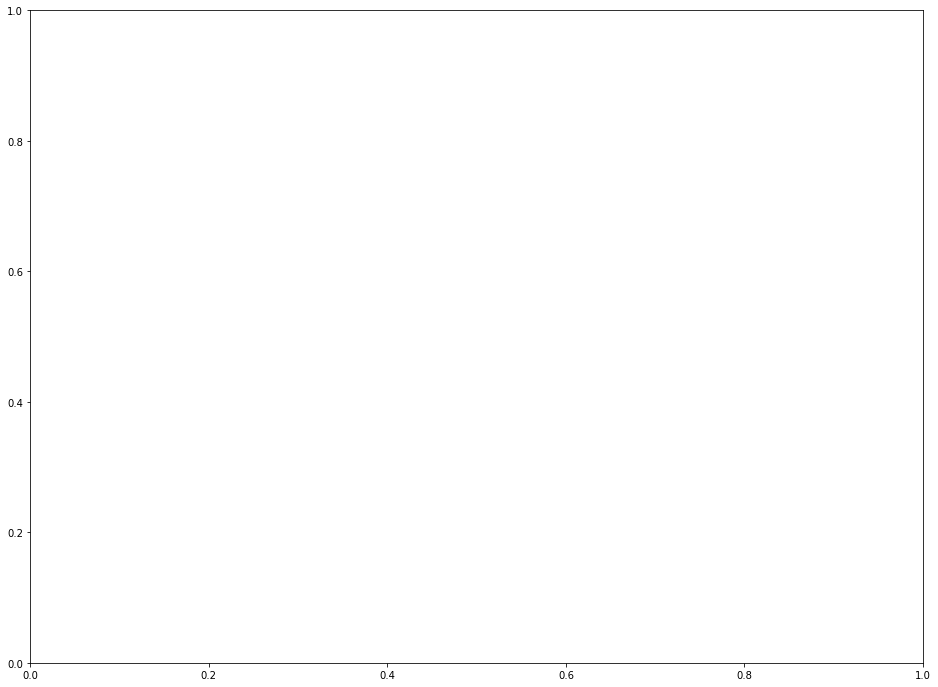

In [155]:
import geoplot as gplt
import matplotlib.pyplot as plt
map_data.census_tract_GEOID = map_data.census_tract_GEOID.astype(str).astype(int)
df.census_tract_GEOID= df.census_tract_GEOID.astype(str).astype(int)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
fullData = map_data.merge(df, left_on=['census_tract_GEOID'], right_on=['census_tract_GEOID'])
fullData.head(2)

In [156]:
# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(fullData['housing-loss-index'], k=10)

In [175]:
gdf = geopandas.GeoDataFrame(fullData, crs="EPSG:4326")

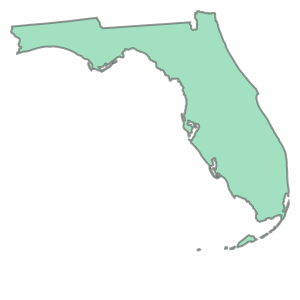

In [186]:
# florida= geopandas.GeoDataFrame('/Users/jeffreyng/Downloads/Data_04/US_STATE.shp')
florida=gpd.read_file('/Users/jeffreyng/Downloads/Data_04/US_STATE.shp')
florida.geometry

In [243]:
orange=gpd.read_file('/Users/jeffreyng/Downloads/Data_04/US_COUNTY.shp')
gdf= geopandas.GeoDataFrame(orange)
orange1=gdf[gdf.STATE=='Florida']
gdf=geopandas.GeoDataFrame(orange1)
gdf=gdf.geometry

In [249]:
sys=geopandas.GeoDataFrame(orange)
sys1= sys[sys.COUNTY=='Orange County']
sys1.loc[2617]

FIPS                                                      12095
x                                                   1.43431e+06
y                                                        715790
REGION_ID                                                     3
DIVISION_I                                                    5
STATE_ID                                                     12
COUNTY_ID                                                    95
REGION                                                    South
DIVISION                                         South Atlantic
STATE                                                   Florida
COUNTY                                            Orange County
geometry      POLYGON ((1398694.764682445 738864.5310236737,...
Name: 2617, dtype: object

In [252]:
gdf.drop(2617)

9       POLYGON ((1425509.635 617445.749, 1430578.247 ...
33      POLYGON ((1368790.185 530816.777, 1367426.253 ...
59      POLYGON ((1291439.143 926411.695, 1295331.256 ...
87      POLYGON ((1220903.473 880268.688, 1221588.034 ...
106     POLYGON ((1534017.466 557782.038, 1577232.605 ...
                              ...                        
2893    POLYGON ((1375764.572 886928.344, 1378102.596 ...
2929    POLYGON ((1291083.167 656439.978, 1291534.219 ...
2940    POLYGON ((1287789.943 748621.991, 1290231.166 ...
3008    POLYGON ((1168780.063 879956.767, 1168485.710 ...
3105    POLYGON ((1215792.262 813930.062, 1218993.395 ...
Name: geometry, Length: 66, dtype: geometry

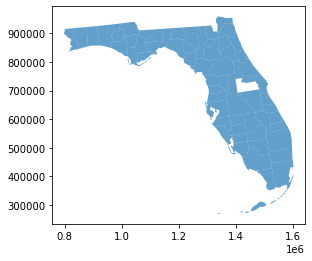

In [271]:

counties=gpd.GeoSeries.plot(gdf.drop(2617), alpha=.7)


/Users/jeffreyng/opt/anaconda3/lib/python3.8/site-packages/geoplot/geoplot.py:66: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


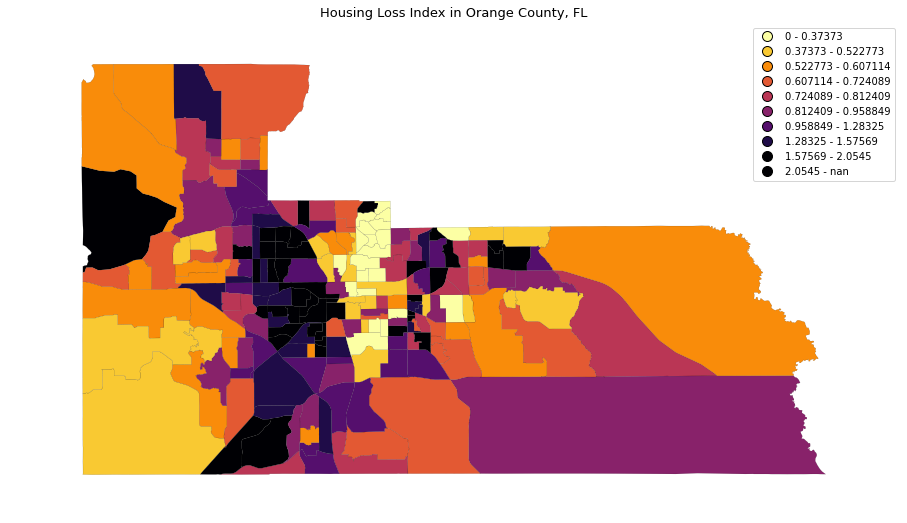

In [176]:
# Map
# Initialize the figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(gdf['housing-loss-index'], k=10)
gplt.choropleth(gdf, 
    hue="housing-loss-index", 
    linewidth=.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax);

ax.set_title('Housing Loss Index in Orange County, FL', fontsize=13);

In [54]:
data1.GEOID

0      12095016602
1      12095015902
2      12095016407
3      12095016507
4      12095017501
          ...     
202    12095014906
203    12095015202
204    12095015402
205    12095015501
206    12095015601
Name: GEOID, Length: 207, dtype: int64

In [60]:
data1['index'][:][0]


'Census Tract 166.02, Orange County, Florida: Summary level: 140, state:12> county:095> tract:016602'

In [62]:
results=data1.set_index('GEOID')

In [325]:
result

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,...,lien-foreclosure-rate-2019,avg-eviction-rate,ratio-to-mean-foreclosure-rate,ratio-to-mean-eviction-rate,avg-housing-loss-rate,evictions-pct-total-housing-loss,housing-loss-index,county_GEOID,county,state
0,12095016602,3357,651,2706,1967,1214,67554,263900,1576,2764,...,2.439024,4.276821,0.699432,1.349617,1.801965,0.590182,0.765360,12095,Orange County,Florida
1,12095015902,993,553,440,266,855,56932,338100,1625,872,...,0.000000,0.759047,1.070093,0.239529,1.000920,0.512048,0.425127,12095,Orange County,Florida
2,12095016407,2172,1701,471,286,1197,35095,163600,1373,1374,...,0.212314,3.185925,2.156399,1.005368,3.163526,0.862126,1.343664,12095,Orange County,Florida
3,12095016507,2072,525,1547,1162,1791,98750,251900,1511,1838,...,0.000000,1.665446,0.591989,0.525557,1.091302,0.474930,0.463515,12095,Orange County,Florida
4,12095017501,4829,1110,3719,2950,1086,62167,252200,1705,2241,...,0.215112,4.345114,1.021183,1.371168,2.230643,0.532559,0.947435,12095,Orange County,Florida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,12095014906,2357,649,1708,1098,1467,64710,214100,1580,1476,...,0.058548,2.213465,0.648098,0.698493,1.394699,0.589582,0.592379,12095,Orange County,Florida
203,12095015202,2365,1327,1038,683,965,39132,163300,1303,1390,...,0.289017,2.989320,1.632296,0.943326,2.752982,0.716876,1.169291,12095,Orange County,Florida
204,12095015402,1069,538,531,299,1303,53958,291700,1253,963,...,0.188324,1.345863,0.832990,0.424708,1.283243,0.674138,0.545040,12095,Orange County,Florida
205,12095015501,1989,949,1040,569,1377,63994,289300,1729,1736,...,0.000000,1.545012,1.125572,0.487552,1.558772,0.619646,0.662067,12095,Orange County,Florida


In [324]:
result['median-household-income', 'single-parent-household', 'english-fluency', 'housing-loss-index', 'level-of-education',
      ]

Index(['census_tract_GEOID', 'total-households',
       'total-renter-occupied-households', 'total-owner-occupied-households',
       'total-owner-occupied-households-mortgage', 'median-gross-rent',
       'median-household-income', 'median-property-value',
       'median-monthly-housing-cost', 'pct-white', 'pct-af-am', 'pct-hispanic',
       'pct-am-indian', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other',
       'pct-below-poverty-level', 'households-children',
       'single-parent-household', 'older-adult-alone', 'level-of-education',
       'immigrant-status', 'english-fluency', 'drive-to-work',
       'public-transport-to-work', 'vacant-properties', 'live-in-mobile-home',
       'pct-renter-occupied', 'pct-owner-occupied',
       'pct-owner-occupied-mortgage', 'pct-owner-occupied-without-mortgage',
       'median-house-age', 'pct-non-white', 'pct-without-health-insurance',
       'total-evictions', 'avg-evictions', 'total-foreclosure-sales',
       'avg-foreclosure-sales', 

In [414]:
total.columns[0:40]

Index(['level_0', 'census_tract_GEOID', 'total-households',
       'total-renter-occupied-households', 'total-owner-occupied-households',
       'total-owner-occupied-households-mortgage', 'median-gross-rent',
       'median-household-income', 'median-property-value',
       'median-monthly-housing-cost', 'pct-white', 'pct-af-am', 'pct-hispanic',
       'pct-am-indian', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other',
       'pct-below-poverty-level', 'households-children',
       'single-parent-household', 'older-adult-alone', 'level-of-education',
       'immigrant-status', 'english-fluency', 'drive-to-work',
       'public-transport-to-work', 'vacant-properties', 'live-in-mobile-home',
       'pct-renter-occupied', 'pct-owner-occupied',
       'pct-owner-occupied-mortgage', 'pct-owner-occupied-without-mortgage',
       'median-house-age', 'pct-non-white', 'pct-without-health-insurance',
       'total-evictions', 'avg-evictions', 'total-foreclosure-sales',
       'avg-foreclosu

In [357]:
result=result.reset_index('census_tract_GEOID')
results=results.reset_index('GEOID')

In [514]:
total= pd.merge(result, results, left_index=True, right_index=True)
total.set_index('census_tract_GEOID')

,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,pct-af-am,...,B25087_036E,B25087_037E,B25087_038E,B25087_039E,B25088_001E,B25088_002E,B25088_003E,B25092_001E,B25092_002E,B25092_003E
census_tract_GEOID,,,,,,,,,,,,,,,,,,,,,
12095016602,3357,651,2706,1967,1214,67554,263900,1576,2764,223,...,0,0,0,0,1350,1576,531,18.8,21.1,11.6
12095015902,993,553,440,266,855,56932,338100,1625,872,72,...,0,21,0,7,1245,1625,677,16.4,18.8,15.1
12095016407,2172,1701,471,286,1197,35095,163600,1373,1374,313,...,0,0,0,0,965,1373,398,17.3,21.6,10.2
12095016507,2072,525,1547,1162,1791,98750,251900,1511,1838,119,...,0,0,0,0,1286,1511,704,17.4,19.4,9.0
12095017501,4829,1110,3719,2950,1086,62167,252200,1705,2241,1982,...,0,0,0,0,1524,1705,313,22.6,24.4,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12095014906,2357,649,1708,1098,1467,64710,214100,1580,1476,504,...,0,0,0,0,1273,1580,481,19.3,21.9,14.5
12095015202,2365,1327,1038,683,965,39132,163300,1303,1390,709,...,0,0,0,0,1042,1303,339,17.9,27.1,9.0
12095015402,1069,538,531,299,1303,53958,291700,1253,963,31,...,0,0,0,8,855,1253,423,17.4,19.9,9.0


In [407]:
df

,geometry
census_tract_GEOID,
12095012402,"POLYGON ((-81.43856 28.59092, -81.43856 28.590..."
12095012000,"POLYGON ((-81.45218 28.57349, -81.45219 28.573..."
12095016602,"POLYGON ((-81.15419 28.56535, -81.15418 28.565..."
12095014904,"POLYGON ((-81.50493 28.55923, -81.50492 28.558..."
12095014702,"POLYGON ((-81.47583 28.53910, -81.47582 28.538..."
...,...
12095017806,"POLYGON ((-81.48867 28.68444, -81.48868 28.684..."
12095014608,"POLYGON ((-81.45939 28.52799, -81.45936 28.527..."
12095014609,"POLYGON ((-81.45930 28.52077, -81.45928 28.519..."


In [416]:
income= total[['census_tract_GEOID', 'median-household-income']]

In [430]:
# total=total.reset_index()
# df= df.reset_index()
income.census_tract_GEOID = income.census_tract_GEOID.astype(str).astype(int)
df.census_tract_GEOID = df.census_tract_GEOID.astype(str).astype(int)
income_map= pd.merge(df, income, on='census_tract_GEOID', how='inner',)

In [431]:
income_map

,census_tract_GEOID,geometry,median-household-income
0,12095012402,"POLYGON ((-81.43856 28.59092, -81.43856 28.590...",31363
1,12095012000,"POLYGON ((-81.45218 28.57349, -81.45219 28.573...",30555
2,12095016602,"POLYGON ((-81.15419 28.56535, -81.15418 28.565...",67554
3,12095014904,"POLYGON ((-81.50493 28.55923, -81.50492 28.558...",34050
4,12095014702,"POLYGON ((-81.47583 28.53910, -81.47582 28.538...",41250
...,...,...,...
202,12095017806,"POLYGON ((-81.48867 28.68444, -81.48868 28.684...",88661
203,12095014608,"POLYGON ((-81.45939 28.52799, -81.45936 28.527...",38617
204,12095014609,"POLYGON ((-81.45930 28.52077, -81.45928 28.519...",41326
205,12095014908,"POLYGON ((-81.49210 28.56448, -81.49211 28.564...",43933


In [446]:
fullData.drop('index', inplace=True, axis=1)

In [464]:
fullData.dropna(inplace=True)

In [466]:
fullData

,census_tract_GEOID,housing-loss-index,geometry
0,12095016602,0.765360,"POLYGON ((-81.15419 28.56535, -81.15418 28.565..."
1,12095015902,0.425127,"POLYGON ((-81.37318 28.58586, -81.37317 28.585..."
2,12095016407,1.343664,"POLYGON ((-81.29907 28.60335, -81.29907 28.602..."
3,12095016507,0.463515,"POLYGON ((-81.20773 28.59536, -81.20789 28.594..."
4,12095017501,0.947435,"POLYGON ((-81.56289 28.60692, -81.56313 28.606..."
...,...,...,...
201,12095014807,0.770131,"POLYGON ((-81.50782 28.52095, -81.50789 28.520..."
202,12095014906,0.592379,"POLYGON ((-81.55858 28.55871, -81.55856 28.555..."
203,12095015202,1.169291,"POLYGON ((-81.43222 28.61269, -81.43234 28.612..."
204,12095015402,0.545040,"POLYGON ((-81.38655 28.60604, -81.38655 28.605..."


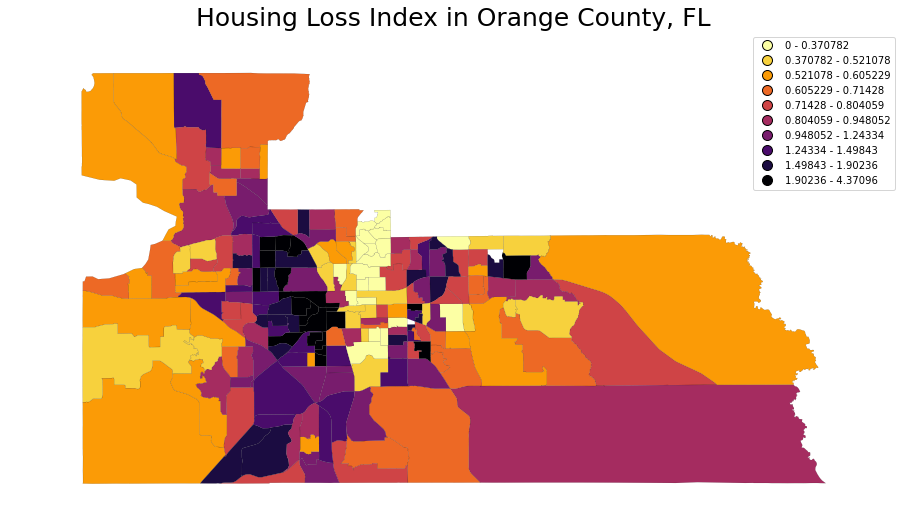

In [654]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
housing_loss=geopandas.GeoDataFrame(fullData)
scheme = mc.Quantiles(housing_loss['housing-loss-index'], k=10)
gplt.choropleth(housing_loss, 
    hue="housing-loss-index", 
    linewidth=.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax)

ax.set_title('Housing Loss Index in Orange County, FL', fontsize=25);

Text(0.5, 1.0, 'Median Household Income in Orange County, FL')

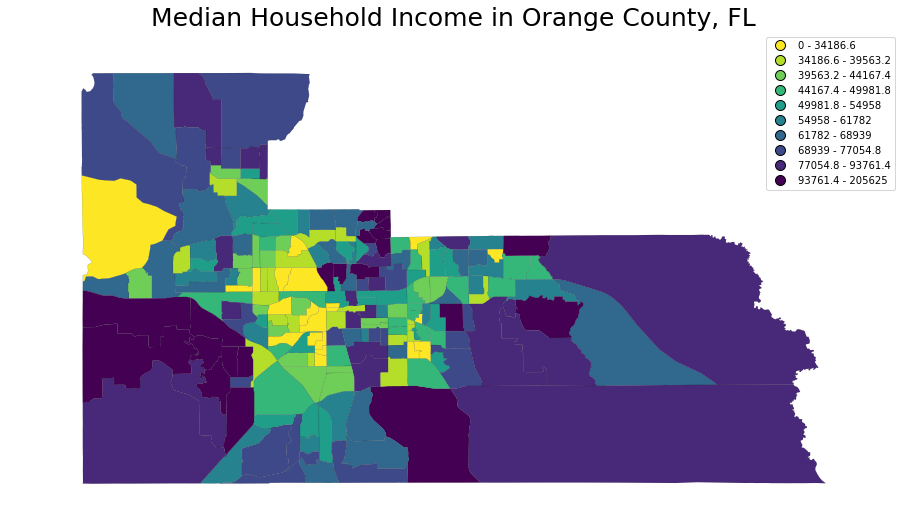

In [653]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
sys=geopandas.GeoDataFrame(income_map)
import matplotlib.pyplot as plt

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(sys['median-household-income'], k=10)
gplt.choropleth(sys, 
    hue="median-household-income", 
    linewidth=.1,
    scheme=scheme, cmap='viridis_r',
    legend=True,
    edgecolor='black',
    ax=ax);

ax.set_title('Median Household Income in Orange County, FL', fontsize=25)

In [527]:
results.rename(mapper=dict_mapper, inplace=True)

In [468]:
data2=pd.read_csv('/Users/jeffreyng/Downloads/Data/American_Community_Survey_Data/acs5_variable_dict_2014_2019.csv')

In [470]:
list_vc=data2.variable_code

In [472]:
list_label=data2.label

In [473]:
dict_mapper=dict(zip(list_vc, list_label))

In [508]:
dict_mapper

{'DP02_0019EA': 'Annotation of Estimate!!RELATIONSHIP!!Population in households!!Householder',
 'DP02_0126E': 'Estimate!!ANCESTRY!!Total population!!Czech',
 'DP02_0072EA': 'Annotation of Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population!!With a disability',
 'DP02_0069PMA': 'Annotation of Percent Margin of Error!!VETERAN STATUS!!Civilian population 18 years and over',
 'DP02_0126M': 'Margin of Error!!ANCESTRY!!Total population!!Czech',
 'DP02_0057PMA': 'Annotation of Percent Margin of Error!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12)',
 'DP02_0125M': 'Margin of Error!!ANCESTRY!!Total population!!Arab',
 'DP02_0054PM': 'Percent Margin of Error!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school, preschool',
 'DP02_0041MA': 'Annotation of Margin of Error!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 mon

In [550]:
df

,census_tract_GEOID,geometry
0,12095012402,"POLYGON ((-81.43856 28.59092, -81.43856 28.590..."
1,12095012000,"POLYGON ((-81.45218 28.57349, -81.45219 28.573..."
2,12095016602,"POLYGON ((-81.15419 28.56535, -81.15418 28.565..."
3,12095014904,"POLYGON ((-81.50493 28.55923, -81.50492 28.558..."
4,12095014702,"POLYGON ((-81.47583 28.53910, -81.47582 28.538..."
...,...,...
202,12095017806,"POLYGON ((-81.48867 28.68444, -81.48868 28.684..."
203,12095014608,"POLYGON ((-81.45939 28.52799, -81.45936 28.527..."
204,12095014609,"POLYGON ((-81.45930 28.52077, -81.45928 28.519..."
205,12095014908,"POLYGON ((-81.49210 28.56448, -81.49211 28.564..."


In [531]:
results.columns

Index(['GEOID', 'index', 'DP02_0001E', 'DP02_0001PE', 'DP02_0002E',
       'DP02_0002PE', 'DP02_0003E', 'DP02_0003PE', 'DP02_0004E', 'DP02_0004PE',
       ...
       'B25087_036E', 'B25087_037E', 'B25087_038E', 'B25087_039E',
       'B25088_001E', 'B25088_002E', 'B25088_003E', 'B25092_001E',
       'B25092_002E', 'B25092_003E'],
      dtype='object', length=1613)

In [554]:
unemployed=results[['GEOID','DP03_0009PE']].rename(columns={'GEOID': 'census_tract_GEOID'})

In [559]:
unemployed.census_tract_GEOID = unemployed.census_tract_GEOID.astype(str).astype(int)
df.census_tract_GEOID = df.census_tract_GEOID.astype(str).astype(int)
unemployed_map= pd.merge(df, unemployed, on='census_tract_GEOID', how='inner',)

In [560]:
unemployed_map

,census_tract_GEOID,geometry,DP03_0009PE
0,12095012402,"POLYGON ((-81.43856 28.59092, -81.43856 28.590...",8.4
1,12095012000,"POLYGON ((-81.45218 28.57349, -81.45219 28.573...",15.3
2,12095016602,"POLYGON ((-81.15419 28.56535, -81.15418 28.565...",2.9
3,12095014904,"POLYGON ((-81.50493 28.55923, -81.50492 28.558...",11.2
4,12095014702,"POLYGON ((-81.47583 28.53910, -81.47582 28.538...",4.9
...,...,...,...
202,12095017806,"POLYGON ((-81.48867 28.68444, -81.48868 28.684...",3.9
203,12095014608,"POLYGON ((-81.45939 28.52799, -81.45936 28.527...",8.3
204,12095014609,"POLYGON ((-81.45930 28.52077, -81.45928 28.519...",5.3
205,12095014908,"POLYGON ((-81.49210 28.56448, -81.49211 28.564...",6.8


Text(0.5, 1.0, 'Unemployment Rates in Orange County, FL')

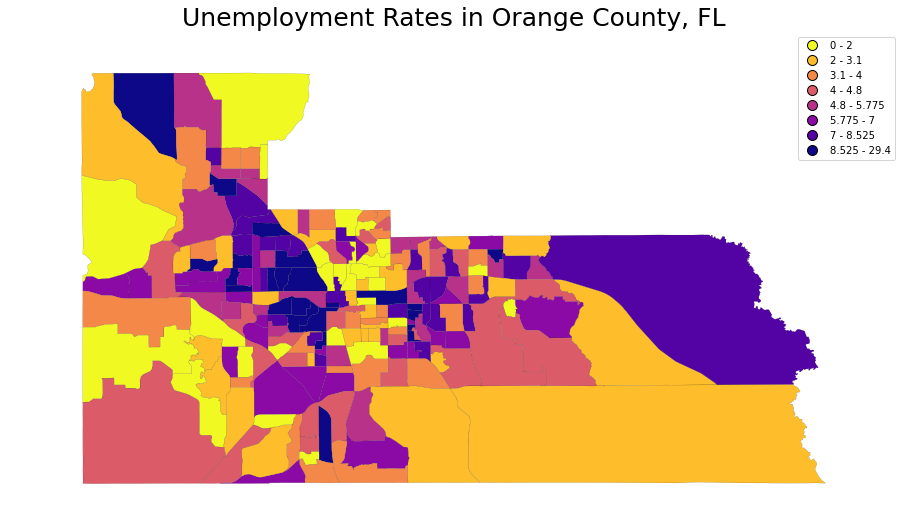

In [652]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
sys=geopandas.GeoDataFrame(unemployed_map)
scheme = mc.Quantiles(sys['DP03_0009PE'], k=8)
gplt.choropleth(sys, 
    hue="DP03_0009PE", 
    linewidth=.1,
    scheme=scheme, cmap='plasma_r',
    legend=True,
    edgecolor='black',
    ax=ax);

ax.set_title('Unemployment Rates in Orange County, FL', fontsize=25)

In [576]:
results

,GEOID,index,DP02_0001E,DP02_0001PE,DP02_0002E,DP02_0002PE,DP02_0003E,DP02_0003PE,DP02_0004E,DP02_0004PE,...,B25087_036E,B25087_037E,B25087_038E,B25087_039E,B25088_001E,B25088_002E,B25088_003E,B25092_001E,B25092_002E,B25092_003E
0,12095016602,"Census Tract 166.02, Orange County, Florida: S...",3357,3357,1857,55.3,618,18.4,288,8.6,...,0,0,0,0,1350,1576,531,18.8,21.1,11.6
1,12095015902,"Census Tract 159.02, Orange County, Florida: S...",993,993,279,28.1,61,6.1,118,11.9,...,0,21,0,7,1245,1625,677,16.4,18.8,15.1
2,12095016407,"Census Tract 164.07, Orange County, Florida: S...",2172,2172,305,14.0,83,3.8,391,18.0,...,0,0,0,0,965,1373,398,17.3,21.6,10.2
3,12095016507,"Census Tract 165.07, Orange County, Florida: S...",2072,2072,1302,62.8,442,21.3,71,3.4,...,0,0,0,0,1286,1511,704,17.4,19.4,9.0
4,12095017501,"Census Tract 175.01, Orange County, Florida: S...",4829,4829,2307,47.8,1150,23.8,409,8.5,...,0,0,0,0,1524,1705,313,22.6,24.4,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,12095014906,"Census Tract 149.06, Orange County, Florida: S...",2357,2357,1550,65.8,586,24.9,136,5.8,...,0,0,0,0,1273,1580,481,19.3,21.9,14.5
203,12095015202,"Census Tract 152.02, Orange County, Florida: S...",2365,2365,627,26.5,191,8.1,65,2.7,...,0,0,0,0,1042,1303,339,17.9,27.1,9.0
204,12095015402,"Census Tract 154.02, Orange County, Florida: S...",1069,1069,378,35.4,81,7.6,54,5.1,...,0,0,0,8,855,1253,423,17.4,19.9,9.0
205,12095015501,"Census Tract 155.01, Orange County, Florida: S...",1989,1989,962,48.4,287,14.4,75,3.8,...,15,13,10,38,1196,1729,693,14.2,17.7,9.0


In [595]:
racial= results[['GEOID','DP05_0038PE']]
racial.rename(columns={'GEOID': 'census_tract_GEOID'}, inplace=True)

/Users/jeffreyng/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [591]:
racial.census_tract_GEOID = racial.census_tract_GEOID.astype(str).astype(int)
df.census_tract_GEOID = df.census_tract_GEOID.astype(str).astype(int)
racial_map= pd.merge(df, racial, on='census_tract_GEOID', how='inner',)

/Users/jeffreyng/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 1.0, 'Black Population in Orange County, FL')

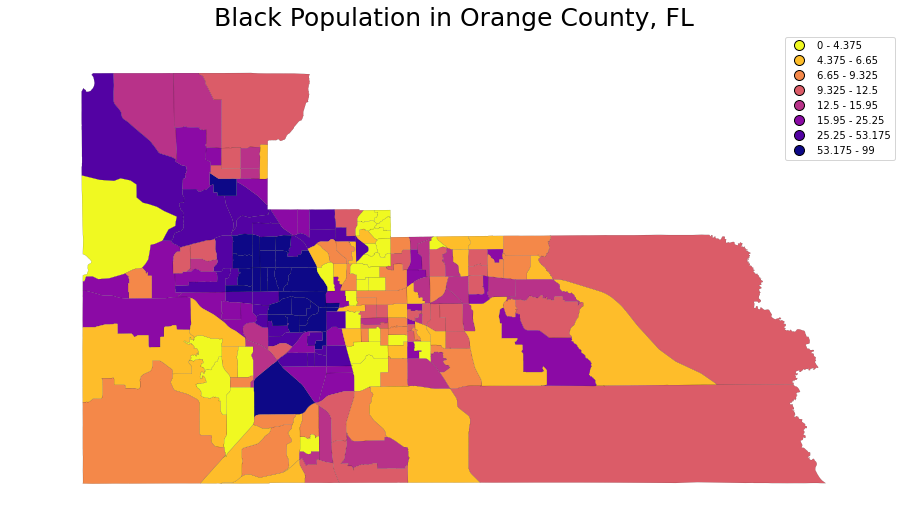

In [651]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
sys=geopandas.GeoDataFrame(racial_map)
scheme = mc.Quantiles(sys['DP05_0038PE'], k=8)
gplt.choropleth(sys, 
    hue="DP05_0038PE", 
    linewidth=.1,
    scheme=scheme, cmap='plasma_r',
    legend=True,
    edgecolor='black',
    ax=ax);

ax.set_title('Black Population in Orange County, FL', fontsize=25)

In [604]:
data2.head(2)

,index,DP02_0001E,DP02_0001PE,DP02_0002E,DP02_0002PE,DP02_0003E,DP02_0003PE,DP02_0004E,DP02_0004PE,DP02_0005E,...,B25087_027E,B25087_028E,B25087_029E,B25088_001E,B25088_002E,B25088_003E,B25092_001E,B25092_002E,B25092_003E,GEOID
0,"Census Tract 165.11, Orange County, Florida: S...",1103,1103,480,43.5,142,12.9,306,27.7,61,...,48,0,0,895,1213,456,23.9,27.8,10.0,12095016511
1,"Census Tract 167.23, Orange County, Florida: S...",1721,1721,1364,79.3,542,31.5,868,50.4,258,...,75,9,21,1212,1360,474,27.1,29.9,14.0,12095016723


In [603]:
data1.head(2)

,index,DP02_0001E,DP02_0001PE,DP02_0002E,DP02_0002PE,DP02_0003E,DP02_0003PE,DP02_0004E,DP02_0004PE,DP02_0005E,...,B25087_037E,B25087_038E,B25087_039E,B25088_001E,B25088_002E,B25088_003E,B25092_001E,B25092_002E,B25092_003E,GEOID
0,"Census Tract 166.02, Orange County, Florida: S...",3357,3357,1857,55.3,618,18.4,288,8.6,143,...,0,0,0,1350,1576,531,18.8,21.1,11.6,12095016602
1,"Census Tract 159.02, Orange County, Florida: S...",993,993,279,28.1,61,6.1,118,11.9,10,...,21,0,7,1245,1625,677,16.4,18.8,15.1,12095015902
2,"Census Tract 164.07, Orange County, Florida: S...",2172,2172,305,14.0,83,3.8,391,18.0,64,...,0,0,0,965,1373,398,17.3,21.6,10.2,12095016407
3,"Census Tract 165.07, Orange County, Florida: S...",2072,2072,1302,62.8,442,21.3,71,3.4,0,...,0,0,0,1286,1511,704,17.4,19.4,9.0,12095016507
4,"Census Tract 175.01, Orange County, Florida: S...",4829,4829,2307,47.8,1150,23.8,409,8.5,189,...,0,0,0,1524,1705,313,22.6,24.4,9.0,12095017501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,"Census Tract 149.06, Orange County, Florida: S...",2357,2357,1550,65.8,586,24.9,136,5.8,97,...,0,0,0,1273,1580,481,19.3,21.9,14.5,12095014906
203,"Census Tract 152.02, Orange County, Florida: S...",2365,2365,627,26.5,191,8.1,65,2.7,0,...,0,0,0,1042,1303,339,17.9,27.1,9.0,12095015202
204,"Census Tract 154.02, Orange County, Florida: S...",1069,1069,378,35.4,81,7.6,54,5.1,15,...,0,0,8,855,1253,423,17.4,19.9,9.0,12095015402
205,"Census Tract 155.01, Orange County, Florida: S...",1989,1989,962,48.4,287,14.4,75,3.8,12,...,13,10,38,1196,1729,693,14.2,17.7,9.0,12095015501


In [632]:
corr_matrix= data2.corrwith(data1, axis=0)

In [633]:
corr_matrix.dropna(axis=0, inplace=True)

In [634]:
# These code definitions are stats that had a jump from 2014-2019

corr_matrix[corr_matrix>.1]
#DP02_0035E        0.114437   Marital Status 15 over (divorced/widowed)
#DP02_0047E        0.136243   GRANDPARENTS, Number of grandparents living with own grandchildren under 18 years
#DP04_0058E        0.231741   School Enrollment (ambiguous in the xls, dont use)
#DP04_0074E        0.130155   Disability 
#DP05_0036E        0.251043   ambiguous (don't use)
#DP05_0042E        0.313947   Number of women 15 to 50 years old who had a birth in the past 12 months
                              #Per 1,000 women 35 to 50 years old

DP02_0035E        0.114437
DP02_0047E        0.136243
DP04_0058E        0.231741
DP04_0074E        0.130155
DP05_0036E        0.251043
DP05_0042E        0.313947
S1701_C01_041E    0.100228
S2506_C01_017E    0.107389
S2506_C01_044E    0.102161
B25056_006E       0.124027
B25056_009E       0.216309
B25056_015E       0.158589
B25056_016E       0.175311
B25056_024E       0.108478
B25061_004E       0.681682
B25061_014E       0.215668
B25063_012E       0.325212
B25063_018E       0.111327
B25070_011E       0.116991
B25074_005E       0.113569
B25074_015E       0.179266
B25074_017E       0.134125
B25074_019E       0.100843
B25074_023E       0.107521
B25074_030E       0.105805
B25074_049E       0.135044
B25074_058E       0.124936
B25074_064E       0.203400
B25075_003E       0.236490
B25075_004E       0.144041
dtype: float64

In [618]:
corr_matrix[corr_matrix<-.2]

DP05_0017E       -0.211783
S2502_C03_018E   -0.219432
S2504_C01_008E   -0.361681
S2504_C01_035E   -0.614063
S2504_C03_008E   -0.326432
S2506_C01_031E   -0.221410
dtype: float64

In [646]:
data1.DP02_0035E.value_counts()

68     4
139    4
60     3
330    3
138    3
      ..
162    1
74     1
676    1
166    1
0      1
Name: DP02_0035E, Length: 158, dtype: int64

In [647]:
data1.DP02_0035E
birth= data1[['GEOID','DP02_0035E']]
birth.rename(columns={'GEOID': 'census_tract_GEOID'}, inplace=True)

In [648]:
birth.census_tract_GEOID = birth.census_tract_GEOID.astype(str).astype(int)
df.census_tract_GEOID = df.census_tract_GEOID.astype(str).astype(int)
birth_map= pd.merge(df, birth, on='census_tract_GEOID', how='inner')

Text(0.5, 1.0, 'Widowed/Divorced women in Orange County, FL')

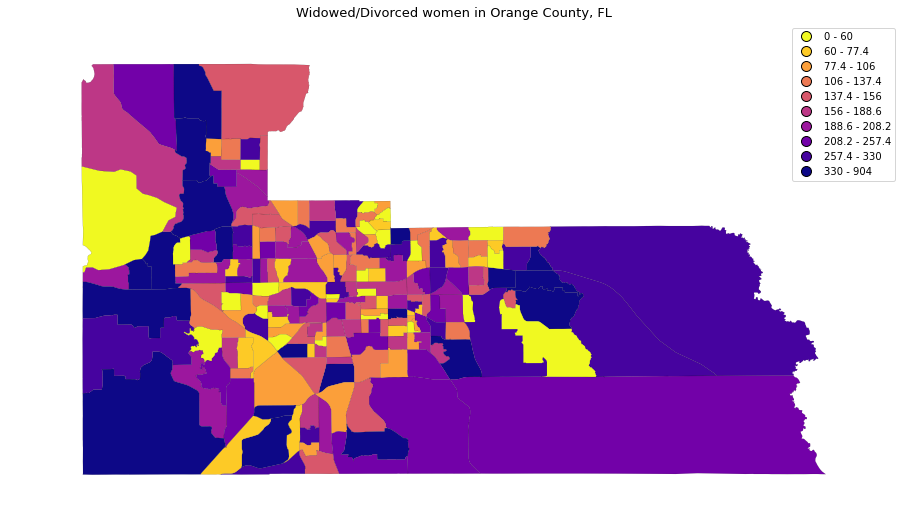

In [650]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
sys=geopandas.GeoDataFrame(birth_map)
scheme = mc.Quantiles(sys['DP02_0035E'], k=10)
gplt.choropleth(sys, 
    hue="DP02_0035E", 
    linewidth=.1,
    scheme=scheme, cmap='plasma_r',
    legend=True,
    edgecolor='black',
    ax=ax);

ax.set_title('Widowed/Divorced women in Orange County, FL', fontsize=13)